<a href="https://colab.research.google.com/github/suajeong52/hw/blob/main/3%EC%9E%A5_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1번**

1-1번 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
d = np.sqrt((13-10)**2 + (19-15)**2)
print(d)

5.0


  >> 1-1번 답 : 5

1-2번

In [3]:
WSS_1 = 3**2 + 5**2 + 4**2 
WSS_2 = 4**2 + 4**2

print(WSS_1)
print(WSS_2)

50
32


In [4]:
TWSS = WSS_1 + WSS_2
print(TWSS)

82


  1-2번 답 :
  
*   군집1 WSS = 50
*   군집2 WSS = 32

*   군집의 TWSS = 82





1-3번

  1-3번 답 : 4
  
*   군집수가 4에서 5로 갈때 급격히 줄어들기 때문

**2번**

In [5]:
data2_1 = [1,4,3,6,2]
data2_2 = [4,2,7,1,5]

In [6]:
data2 = np.array([[1,4], [4,2], [3,7], [6,1], [2,5]])

data2

array([[1, 4],
       [4, 2],
       [3, 7],
       [6, 1],
       [2, 5]])

In [7]:
# 표준화

scaler = StandardScaler()
scaler.fit(data2)
data_std2 = scaler.transform(data2)
print(data_std2)

[[-1.27872403  0.09365858]
 [ 0.46499055 -0.84292723]
 [-0.11624764  1.4985373 ]
 [ 1.62746694 -1.31122014]
 [-0.69748583  0.56195149]]


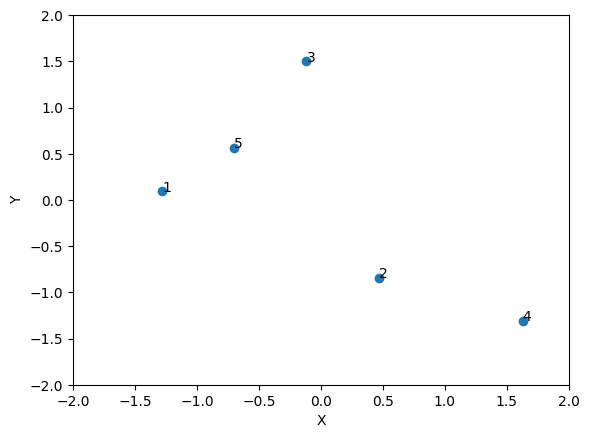

In [8]:
plt.scatter(data_std2[:,0], data_std2[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-2,2)

rows,columns = data_std2.shape

for i in range(rows):
  plt.annotate(i+1, (data_std2[i,0], data_std2[i,1]))

In [9]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_std2)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 0 1 0 1]
[[ 1.04622875 -1.07707368]
 [-0.69748583  0.71804912]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


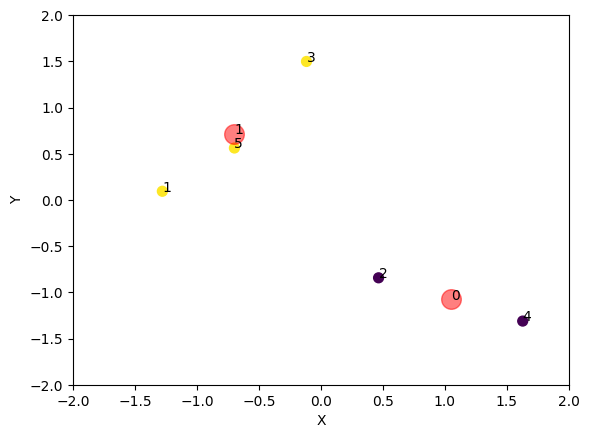

In [10]:
# 결과 분석
# 군집 데이터 분포 
plt.scatter(data_std2[:,0], data_std2[:,1], c=kmeans.labels_, s=50)
# plt.title('X와 Y에 대한 분포: 표준화')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# 행과 열의 수
rows, columns = data_std2.shape

# 데이터 라벨
for i in range(rows):
  plt.annotate(i+1, (data_std2[i,0], data_std2[i,1]))  

# 군집 중심 표시 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            c='red', s=200, alpha=0.5);
# 군집 라벨 
for k in range(columns):
  plt.annotate(k, 
              (kmeans.cluster_centers_[k, 0], kmeans.cluster_centers_[k, 1]))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

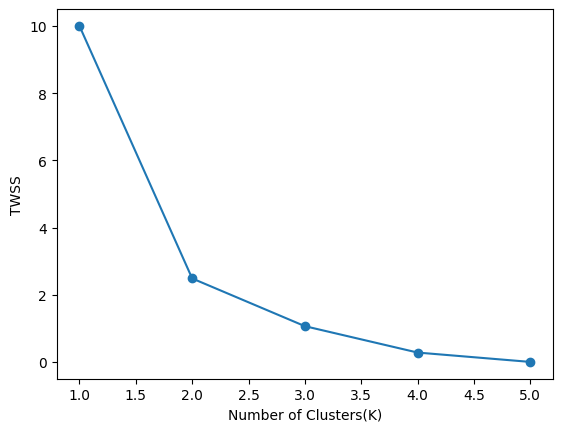

In [11]:
# 클러스터 수별 TWSS 값  
TWSS = {}
# 군집 수 1~5까지 반복 
for k in range(1, 6): 
  # 군집 수 설정과 군집화 객체 생성 
  model2 = KMeans(n_clusters=k)
  # 표준화된 X, Y 데이터에 대한 군집화  
  model2.fit(data_std2)
  # 군집 수별 TWSS 값 저장 
  TWSS[k] = model2.inertia_

# # 군집 수에 따른 TWSS 그래프
plt.plot(list(TWSS.keys()), list(TWSS.values()), marker='o')
plt.xlabel("Number of Clusters(K)")
plt.ylabel("TWSS")
plt.show()

In [12]:
k1 = kmeans.cluster_centers_[:, 0]
k1

array([ 1.04622875, -0.69748583])

In [13]:
k2 = kmeans.cluster_centers_[:, 1]
k2

array([-1.07707368,  0.71804912])

In [14]:
print(data_std2)

[[-1.27872403  0.09365858]
 [ 0.46499055 -0.84292723]
 [-0.11624764  1.4985373 ]
 [ 1.62746694 -1.31122014]
 [-0.69748583  0.56195149]]


In [15]:
0.09365858, -0.84292723, 1.4985373, -1.31122014, 0.56195149

(0.09365858, -0.84292723, 1.4985373, -1.31122014, 0.56195149)

In [16]:
d0_1 = np.sqrt((-0.69748583-(0.71804912))**2 + (-1.27872403-0.09365858)**2)
d0_2 = np.sqrt((-0.69748583-(0.71804912))**2 + (0.46499055-(-0.84292723))**2)
d0_3 = np.sqrt((-0.69748583-(0.71804912))**2 + (-0.11624764-1.4985373 )**2)
d0_4 = np.sqrt((-0.69748583-(0.71804912))**2 + (1.62746694-(-1.31122014))**2)
d0_5 = np.sqrt((-0.69748583-(0.71804912))**2 + (-0.69748583-0.56195149)**2)

print(d0_1)
print(d0_2)
print(d0_3)
print(d0_4)
print(d0_5)

1.9715915456559239
1.9272747894142213
2.1473866901707077
3.261843182746594
1.8947088319001115


In [17]:
d1_1 = np.sqrt((1.04622875-(-1.07707368))**2 + (-1.27872403-0.09365858)**2)
d1_2 = np.sqrt((1.04622875-(-1.07707368))**2 + (0.46499055-(-0.84292723))**2)
d1_3 = np.sqrt((1.04622875-(-1.07707368))**2 + (-0.11624764-1.4985373 )**2)
d1_4 = np.sqrt((1.04622875-(-1.07707368))**2 + (1.62746694-(-1.31122014))**2)
d1_5 = np.sqrt((1.04622875-(-1.07707368))**2 + (-0.69748583-0.56195149)**2)

print(d1_1)
print(d1_2)
print(d1_3)
print(d1_4)
print(d1_5)

2.5282102834761027
2.493804749470983
2.6675726066397347
3.62550616651011
2.46872347018711


In [18]:
WSS2_0 = d0_1**2 + d0_2**2 + d0_3**2 + d0_4**2 + d0_5**2
WSS2_1 = d1_1**2 + d1_2**2 + d1_3**2 + d1_4**2 + d1_5**2

print(WSS2_0)
print(WSS2_1)

26.44237344044657
38.965743513308574


In [19]:
TWSS2 = WSS2_0+WSS2_1
print(TWSS2)

65.40811695375514


In [20]:
data2_1_m = np.mean(data2_1)
data2_2_m = np.mean(data2_2)

print(data2_1_m)
print(data2_2_m)



3.2
3.8


In [21]:
data2_1_s = np.std(data2_1)
data2_2_s = np.std(data2_2)

print(data2_1_s)
print(data2_2_s)

1.7204650534085253
2.1354156504062622


  2-1번 답 :
  


1.   3.2
2.   1.7204650534085253
3.   3.8
4.   2.1354156504062622
5.   -1.27872403, 0.46499055, -0.11624764, 1.62746694, -0.69748583
6.   0.09365858, -0.84292723, 1.4985373, -1.31122014, 0.56195149
7.   1.9715915456559239,  1.9272747894142213,  2.1473866901707077,  3.261843182746594,  1.8947088319001115
8.   2.5282102834761027,  2.493804749470983,  2.6675726066397347,  3.62550616651011,  2.46872347018711
9.   1, 2, 1, 2, 1





  2-2번 답 :
  
*   군집1 중심 = (-0.69748583, 0.71804912)
*   군집2 중심 = (1.04622875, -1.07707368)


  2-3번 답 :
  
*   군집1 WSS = 26.44237344044657

*   군집2 WSS = 38.965743513308574

*   군집의 TWSS = 65.40811695375514

**응용문제**

In [22]:
import statsmodels.api as sm

In [23]:
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
print(mtcars)

                      mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4            21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag        21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710           22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive       21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout    18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   
Valiant              18.1    6  225.0  105  2.76  3.460  20.22   1   0     3   
Duster 360           14.3    8  360.0  245  3.21  3.570  15.84   0   0     3   
Merc 240D            24.4    4  146.7   62  3.69  3.190  20.00   1   0     4   
Merc 230             22.8    4  140.8   95  3.92  3.150  22.90   1   0     4   
Merc 280             19.2    6  167.6  123  3.92  3.440  18.30   1   0     4   
Merc 280C            17.8    6  167.6  123  3.92  3.440  18.90   1   0     4   
Merc 450SE           16.4    8  275.8  1

In [24]:
data = mtcars[['hp', 'mpg']]

print(data)

                      hp   mpg
Mazda RX4            110  21.0
Mazda RX4 Wag        110  21.0
Datsun 710            93  22.8
Hornet 4 Drive       110  21.4
Hornet Sportabout    175  18.7
Valiant              105  18.1
Duster 360           245  14.3
Merc 240D             62  24.4
Merc 230              95  22.8
Merc 280             123  19.2
Merc 280C            123  17.8
Merc 450SE           180  16.4
Merc 450SL           180  17.3
Merc 450SLC          180  15.2
Cadillac Fleetwood   205  10.4
Lincoln Continental  215  10.4
Chrysler Imperial    230  14.7
Fiat 128              66  32.4
Honda Civic           52  30.4
Toyota Corolla        65  33.9
Toyota Corona         97  21.5
Dodge Challenger     150  15.5
AMC Javelin          150  15.2
Camaro Z28           245  13.3
Pontiac Firebird     175  19.2
Fiat X1-9             66  27.3
Porsche 914-2         91  26.0
Lotus Europa         113  30.4
Ford Pantera L       264  15.8
Ferrari Dino         175  19.7
Maserati Bora        335  15.0
Volvo 14

In [25]:
df3 = data[['hp', 'mpg']]

**산포도그리기**

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'mpg')

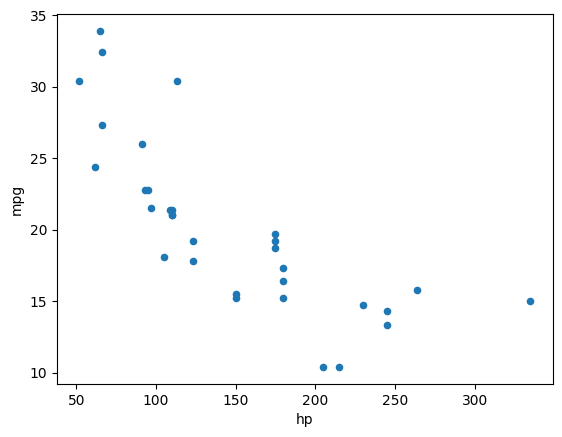

In [26]:
df3.plot.scatter(x='hp', y='mpg')
plt.xlabel("hp")
plt.ylabel("mpg")

**데이터 표준화**

In [27]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
print(data_std)

[[-0.54365487  0.15329914]
 [-0.54365487  0.15329914]
 [-0.7955699   0.4567366 ]
 [-0.54365487  0.22072968]
 [ 0.41954967 -0.23442651]
 [-0.61774753 -0.33557233]
 [ 1.45684686 -0.97616253]
 [-1.25494437  0.72645879]
 [-0.76593284  0.4567366 ]
 [-0.35101396 -0.15013833]
 [-0.35101396 -0.38614524]
 [ 0.49364233 -0.62215216]
 [ 0.49364233 -0.47043343]
 [ 0.49364233 -0.8244438 ]
 [ 0.86410561 -1.63361037]
 [ 1.01229092 -1.63361037]
 [ 1.23456889 -0.90873199]
 [-1.19567025  2.07506974]
 [-1.40312969  1.737917  ]
 [-1.21048878  2.32793429]
 [-0.73629578  0.23758732]
 [ 0.04908639 -0.77387089]
 [ 0.04908639 -0.8244438 ]
 [ 1.45684686 -1.1447389 ]
 [ 0.41954967 -0.15013833]
 [-1.19567025  1.21533026]
 [-0.82520696  0.99618098]
 [-0.49919927  1.737917  ]
 [ 1.73839896 -0.72329798]
 [ 0.41954967 -0.06585014]
 [ 2.79051468 -0.85815908]
 [-0.5584734   0.22072968]]


Text(0, 0.5, 'mpg')

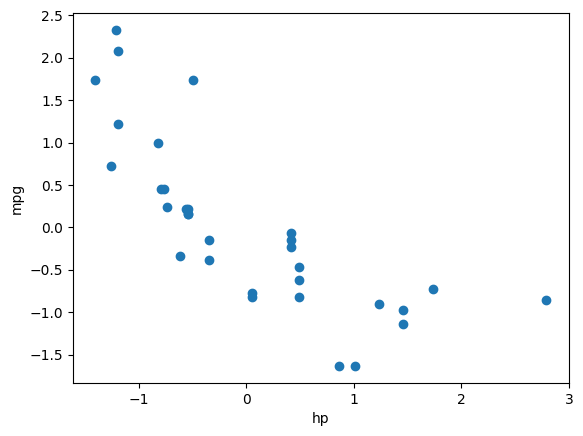

In [28]:
X = data_std[:, 0]
Y = data_std[:, 1]

plt.scatter(X, Y)
plt.xlabel("hp")
plt.ylabel("mpg")

**군집화**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

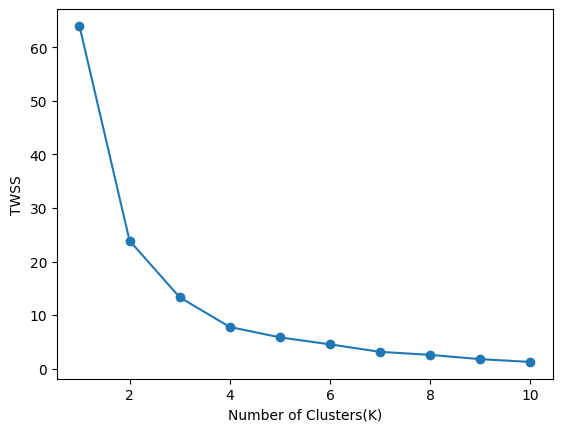

In [29]:
# 클러스터 수별 TWSS 값  
TWSS = {}
 
for k in range(1, 11): 
  model = KMeans(n_clusters=k)
  model.fit(data_std)
  TWSS[k] = model.inertia_

# # 군집 수에 따른 TWSS 그래프
plt.plot(list(TWSS.keys()), list(TWSS.values()), marker='o')
plt.xlabel("Number of Clusters(K)")
plt.ylabel("TWSS")
plt.show()

In [30]:
K=4
kmeans = KMeans(n_clusters=K)
kmeans.fit(data_std)
# 군집 중심 
centers = kmeans.cluster_centers_
# 군집 라벨 
labels = kmeans.labels_
print(centers)
print(labels)

[[ 1.50765326 -1.12547303]
 [-0.68510449  0.28509521]
 [ 0.27630387 -0.48354492]
 [-1.10083165  1.81883366]]
[1 1 1 1 2 1 0 1 1 1 2 2 2 2 0 0 0 3 3 3 1 2 2 0 2 3 1 3 0 2 0 1]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


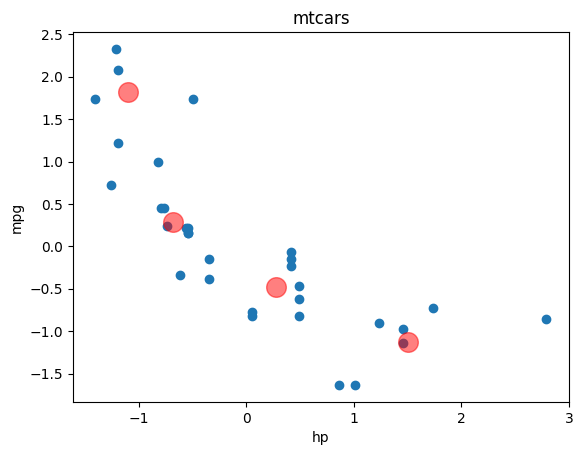

In [31]:
X = data_std[:, 0]
Y = data_std[:, 1]
plt.scatter(X, Y)
plt.title('mtcars')
plt.xlabel('hp')
plt.ylabel('mpg')

# 군집 중심 표시 
X = centers[:, 0]
Y = centers[:, 1]
plt.scatter(X, Y, c='red', s=200, alpha=0.5);
plt.show()

**클러스터 출력**

군집은 4개, 군집수가 4에서 5로 갈때 급격히 줄어들기 때문